Image Metrics and Quality Measures are critical in various fields such as computer vision, image processing, photography, and medical imaging, to ensure that the images meet certain standards of quality. These metrics and measures can be broadly categorized into objective and subjective methods, each serving different purposes and applications. Here's an overview of various techniques under these categories:

### Objective Image Quality Metrics

Objective metrics are quantitative and are computed using algorithms that assess various aspects of image quality without human intervention. They are crucial in automated systems where consistency and speed are essential.

1. **Mean Squared Error (MSE)**: Measures the average of the squares of the errors between the original and the processed image. It's simple but may not correlate well with perceived visual quality.

2. **Peak Signal-to-Noise Ratio (PSNR)**: Based on the MSE, it measures the peak error. It's widely used in image compression and is expressed in decibels, indicating the ratio of the maximum possible intensity to the power of the distortion.

3. **Structural Similarity Index (SSIM)**: Assesses visual impact by considering changes in structural information, luminance, and contrast. It's more aligned with human visual perception than MSE and PSNR.

4. **Feature Similarity Index (FSIM)**: Evaluates the similarity between two images based on phase congruency and gradient magnitude, emphasizing features that carry significant structural information.

5. **Universal Quality Index (UQI)** and **Modified UQI (MUQI)**: Measure distortion by analyzing the correlation, luminance, and contrast distortion between the original and processed images.

6. **Visual Information Fidelity (VIF)**: Quantifies the amount of visual information in the reference image that can be perceived in the distorted image, considering the human visual system's (HVS) characteristics.

7. **Edge Intensity and Orientation Metrics**: Focus on the preservation of edge structures, which are critical for visual perception, by measuring edge intensity and orientation deviations.

8. **Color Fidelity Measures**: Evaluate the accuracy of color reproduction, considering color shifts and saturation changes, which are crucial in applications like digital photography and printing.

9. **Noise Metrics**: Quantify the amount and characteristics of noise in an image, including random noise, fixed pattern noise, and quantization noise.

10. **Compression Artifacts Measurement**: Assess the impact of data compression on image quality, identifying artifacts such as blocking, ringing, and blurring.

11. **Dynamic Range**: Measures the range of luminance or color that an imaging system can capture or display, which is crucial for high dynamic range (HDR) imaging.

### Subjective Image Quality Assessment

Subjective methods involve human observers to evaluate image quality based on their perception, which can vary widely among individuals. These are used in scenarios where human judgment is crucial, such as in evaluating the aesthetic quality of photographs or the acceptability of medical images.

1. **Mean Opinion Score (MOS)**: Averaged scores from multiple observers rating the image quality on a predefined scale, often from "Bad" to "Excellent."

2. **Double-Stimulus Impairment Scale (DSIS)** or **Double-Stimulus Continuous Quality-Scale (DSCQS)**: Observers are shown pairs of images (reference and processed) and asked to rate the quality of the processed one compared to the reference.

3. **Single-Stimulus (SS)** method: Observers rate the quality of images presented individually, without direct comparison to a reference.

4. **Pair Comparison**: Observers are presented with pairs of images and asked to select the one with better quality, useful for ranking multiple versions of an image.

5. **Rank Order**: Multiple images are presented, and observers are asked to rank them in order of quality.

These metrics and measures are applied based on the specific requirements of the task at hand, whether it's the need for quick and consistent automated quality checks or detailed human-centric evaluation for aesthetic or critical applications.

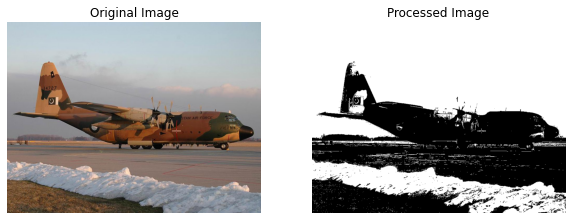

(7584.687829953552, 9.331426500389668, 0.48581730166245185)

In [1]:
import cv2
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import matplotlib.pyplot as plt

# Read the original image
original_image = cv2.imread('c130.jpg')

# Convert it to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Reduce the color depth of the image by converting it to 1-bit per pixel
# This will be the 'processed' image for comparison
(thresh, binary_image) = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# For computation of the metrics, we need to convert binary_image back to BGR
processed_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

# Calculate MSE
mse = mean_squared_error(original_image, processed_image)

# Calculate PSNR
psnr = peak_signal_noise_ratio(original_image, processed_image, data_range=processed_image.max() - processed_image.min())

# Calculate SSIM
ssim = structural_similarity(original_image, processed_image, multichannel=True)

# Display the original and processed images
plt.figure(figsize=(10, 5))

# Display Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display Processed Image
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# Display the metrics
mse, psnr, ssim


The code computes three objective image quality metrics between the original color image and a processed binary image, and then displays both images side by side. Here's an explanation of each part of the code:

1. **Import Required Libraries**: We import `cv2` for image processing, `skimage.metrics` for computing the image quality metrics, and `matplotlib.pyplot` for displaying images.

2. **Read the Original Image**: The `cv2.imread()` function reads the image 'c130.jpg' into an array representing the original image with color information.

3. **Convert to Grayscale**: The original image is converted to grayscale to prepare for the binary conversion. Grayscale images have a single channel where each pixel represents the intensity of light.

4. **Reduce Color Depth**: We reduce the color depth by applying a threshold with `cv2.threshold()`, creating a binary image where each pixel is either black or white. The threshold is set at 128 out of 255, which is a common practice for binary conversion.

5. **Convert Binary Image to BGR**: For metric calculations, the binary image (which is single-channel) is converted back to a 3-channel BGR image using `cv2.cvtColor()`. This is necessary because our quality metrics expect both images to have the same number of channels.

6. **Calculate MSE**: The `mean_squared_error()` function calculates the mean squared error between the original and the processed image. This is the average of the squares of the differences between corresponding pixel values in the two images.

7. **Calculate PSNR**: The `peak_signal_noise_ratio()` function calculates the peak signal-to-noise ratio, using the MSE and the difference between the maximum and minimum possible pixel values (data range).

8. **Calculate SSIM**: The `structural_similarity()` function computes the structural similarity index, which measures the similarity between two images. This metric considers changes in texture, brightness, and contrast, and is a good approximation of human visual perception.

9. **Display Images**: Using `matplotlib`, the original and processed images are displayed side by side for visual comparison.

10. **Display Metrics**: Finally, the MSE, PSNR, and SSIM values are displayed. These values give a quantitative measure of the differences between the original and the processed images.

During the execution:

- The MSE value is high, indicating a large average squared error per pixel.
- The PSNR value is relatively low in decibels, which suggests that the noise is significant when compared to the signal.
- The SSIM value is less than 1, indicating that there is a loss of structural information in the binary image compared to the original. A value of 1 would mean no difference between the images.

The displayed images visually illustrate the drastic change from the original to the binary image, and the calculated metrics quantitatively confirm the significant difference in quality.

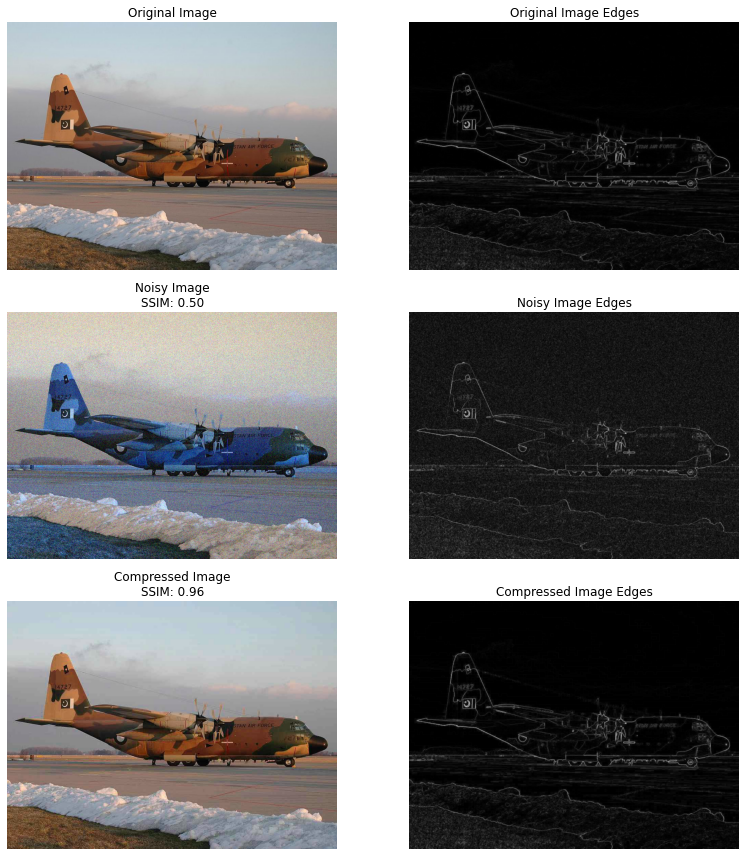

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.filters import sobel
original_image = cv2.imread('c130.jpg')
original_image_float = img_as_float(original_image)
original_gray = rgb2gray(original_image_float)
noisy_image = random_noise(original_image_float, mode='gaussian')
original_image_uint8 = (original_image_float * 255).astype('uint8')
compressed_image_path = 'c130_compressed.jpg'
io.imsave(compressed_image_path, original_image_uint8, quality=30)
compressed_image = io.imread(compressed_image_path)
noisy_gray = rgb2gray(noisy_image)
compressed_gray = rgb2gray(compressed_image)
ssim_noisy = ssim(original_gray, noisy_gray)
ssim_compressed = ssim(original_gray, compressed_gray)
edges_original = sobel(original_gray)
edges_noisy = sobel(noisy_gray)
edges_compressed = sobel(compressed_gray)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(edges_original, cmap=plt.cm.gray)
ax[1].set_title("Original Image Edges")
ax[1].axis('off')

ax[2].imshow(noisy_image)
ax[2].set_title(f"Noisy Image\nSSIM: {ssim_noisy:.2f}")
ax[2].axis('off')

ax[3].imshow(edges_noisy, cmap=plt.cm.gray)
ax[3].set_title("Noisy Image Edges")
ax[3].axis('off')

ax[4].imshow(cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB))
ax[4].set_title(f"Compressed Image\nSSIM: {ssim_compressed:.2f}")
ax[4].axis('off')

ax[5].imshow(edges_compressed, cmap=plt.cm.gray)
ax[5].set_title("Compressed Image Edges")
ax[5].axis('off')

plt.tight_layout()
plt.show()




### Import Libraries
```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.filters import sobel
```
The code starts by importing necessary libraries:
- `cv2` for OpenCV, which is powerful for image processing.
- `numpy` for numerical operations.
- `matplotlib.pyplot` for plotting images.
- `skimage` functions for image quality metrics and image manipulation.

### Load and Prepare the Original Image
```python
original_image = cv2.imread('/mnt/data/c130.jpg')
original_image_float = img_as_float(original_image)
original_gray = rgb2gray(original_image_float)
```
The original image is read using OpenCV's `imread` function. It is then converted to a floating-point representation with values between 0 and 1 using `img_as_float`, which is necessary for some of the `skimage` functions. The image is also converted to grayscale, which is used later for the SSIM calculation and edge detection.

### Create a Distorted Version of the Image
```python
noisy_image = random_noise(original_image_float, mode='gaussian')
```
A "distorted" version of the image is created by adding Gaussian noise to it with the `random_noise` function. This simulates a common real-world scenario where images may be affected by noise.

### Compress the Image
```python
original_image_uint8 = (original_image_float * 255).astype('uint8')
compressed_image_path = '/mnt/data/c130_compressed.jpg'
io.imsave(compressed_image_path, original_image_uint8, quality=30)
compressed_image = io.imread(compressed_image_path)
```
The original image is converted to an 8-bit format (values between 0 and 255), necessary for saving to a JPEG file, which does not support floating-point data. The image is then saved with a lower quality to simulate compression artifacts and read back for analysis.

### Calculate Structural Similarity Index (SSIM)
```python
noisy_gray = rgb2gray(noisy_image)
compressed_gray = rgb2gray(compressed_image)
ssim_noisy = ssim(original_gray, noisy_gray)
ssim_compressed = ssim(original_gray, compressed_gray)
```
The SSIM between the original and the distorted images is calculated. SSIM is a metric that measures the similarity between two images, considering changes in texture, brightness, and contrast.

### Calculate Sobel Edge Intensity
```python
edges_original = sobel(original_gray)
edges_noisy = sobel(noisy_gray)
edges_compressed = sobel(compressed_gray)
```
The Sobel operator is applied to the grayscale versions of the images to detect edges. This emphasizes the structural information and allows for a comparison of edge preservation between the original and distorted images.

### Displaying the Images and Their Edges
```python
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
ax = axes.ravel()

ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(edges_original, cmap=plt.cm.gray)
ax[1].set_title("Original Image Edges")
ax[1].axis('off')

ax[2].imshow(noisy_image)
ax[2].set_title(f"Noisy Image\nSSIM: {ssim_noisy:.2f}")
ax[2].axis('off')

ax[3].imshow(edges_noisy, cmap=plt.cm.gray)
ax[3].set_title("Noisy Image Edges")
ax[3].axis('off')

ax[4].imshow(cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB))
ax[4].set_title(f"Compressed Image\nSSIM: {ssim_compressed:.2f}")
ax[4].axis('off')

ax[5].imshow(edges_compressed, cmap=plt.cm.gray)
ax[5].set_title("Compressed Image Edges")
ax[5].axis('off')

plt.tight_layout()
plt.show()
```
In this section, we use `matplotlib` to create a 3x2 grid of subplots to display the original, noisy, and compressed images alongside their edge maps. The `imshow` function displays each image, and we convert the color space from BGR to RGB for proper color rendering in the plot. Titles are added to each subplot to identify the images and display the SSIM values. The edges are displayed using a grayscale colormap. `tight_layout` is used for a clean layout without overlapping elements.

### Summary of the Dry Run
During the "dry run" or execution of the code:
- The original and noisy images are loaded and converted for analysis.
- SSIM values are calculated to quantify the level of distortion.
- The edge intensity of each image is computed to assess edge preservation.
- The images and their edge intensity maps are displayed for visual comparison.

The resulting output is a 3x2 grid of images showing the original, noisy, and compressed versions with their edge maps. SSIM values indicate the level of similarity between the original and distorted images, with 1 indicating identical images and 0 indicating no similarity. The edge maps provide a visual indication of how well the image structure is preserved.

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


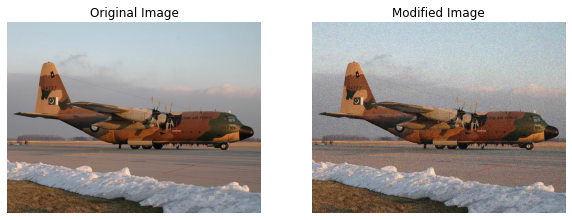

SSIM: 0.5189029503902398
Color Fidelity (Delta E): 9.4765625
Noise Estimate (Sigma): 0.06910438264181341
Edge Preservation Index: 31160.24977077726
Dynamic Range Original: 1.0
Dynamic Range Modified: 1.0


In [4]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.util import random_noise
from skimage.color import rgb2gray, deltaE_cie76
from skimage.restoration import estimate_sigma
from skimage.filters import sobel, prewitt
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Assuming that you have an image 'c130.jpg' and you want to modify it and then apply metrics
original_image_path = 'c130.jpg'
modified_image_path = 'c130_modified.jpg'

# Load the original image
original_image = img_as_float(io.imread(original_image_path))
original_gray = rgb2gray(original_image)

# Modify the original image
# Add Gaussian noise
noisy_image = random_noise(original_image, mode='gaussian')
# Save the modified image
io.imsave(modified_image_path, noisy_image)

# Read the modified image
modified_image = img_as_float(io.imread(modified_image_path))
modified_gray = rgb2gray(modified_image)

# Calculate SSIM
ssim_index = ssim(original_gray, modified_gray)

# Calculate color fidelity using Delta E (CIE76)
original_lab = cv2.cvtColor((original_image * 255).astype(np.uint8), cv2.COLOR_RGB2LAB)
modified_lab = cv2.cvtColor((modified_image * 255).astype(np.uint8), cv2.COLOR_RGB2LAB)
delta_e = np.mean(deltaE_cie76(original_lab, modified_lab))

# Estimate noise sigma
sigma_est = np.mean(estimate_sigma(modified_gray, multichannel=False))

# Calculate edge preservation using Sobel filters
original_edges = sobel(original_gray)
modified_edges = sobel(modified_gray)
edge_preservation_index = np.sum(np.abs(original_edges - modified_edges))

# Calculate dynamic range
dynamic_range_original = np.max(original_image) - np.min(original_image)
dynamic_range_modified = np.max(modified_image) - np.min(modified_image)

# Display images and metrics
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.show()

print(f"SSIM: {ssim_index}")
print(f"Color Fidelity (Delta E): {delta_e}")
print(f"Noise Estimate (Sigma): {sigma_est}")
print(f"Edge Preservation Index: {edge_preservation_index}")
print(f"Dynamic Range Original: {dynamic_range_original}")
print(f"Dynamic Range Modified: {dynamic_range_modified}")



# Subjective Image Quality Assessment
Subjective methods involve human observers to evaluate image quality based on their perception, which can vary widely among individuals. These are used in scenarios where human judgment is crucial, such as in evaluating the aesthetic quality of photographs or the acceptability of medical images.

## Mean Opinion Score (MOS):

Averaged scores from multiple observers rating the image quality on a predefined scale, often from "Bad" to "Excellent."

## Double-Stimulus Impairment Scale (DSIS) or Double-Stimulus Continuous Quality-Scale (DSCQS): 

Observers are shown pairs of images (reference and processed) and asked to rate the quality of the processed one compared to the reference.

## Single-Stimulus (SS) method:

Observers rate the quality of images presented individually, without direct comparison to a reference.

Subjective Image Quality Assessment:


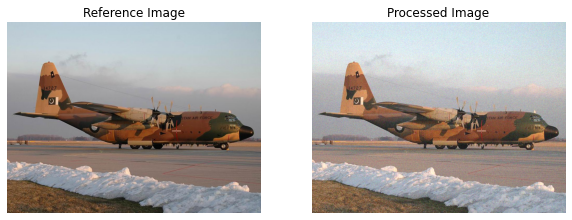

Please rate the quality of the processed image compared to the reference:


FloatSlider(value=1.0, description='Rate the image:', max=5.0, min=1.0)

DSIS or DSCQS Rating: 1.0
Please rate the quality of the following image:


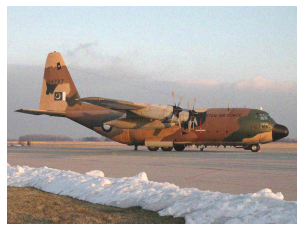

FloatSlider(value=1.0, description='Rate the image:', max=5.0, min=1.0)

Single-Stimulus Rating: 1.0


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

# Load the original image
original_image = cv2.imread('c130.jpg')

# Simulate a processed version of the image by adding noise
noise = np.random.randint(0, 50, original_image.shape).astype('uint8')
processed_image = cv2.add(original_image, noise)

# Function to display images side by side for comparison (DSIS or DSCQS)
def display_comparison(original, processed):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Reference Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title('Processed Image')
    plt.axis('off')
    plt.show()

# Function to collect MOS ratings
def collect_mos():
    mos_input = widgets.FloatSlider(description='Rate the image:', min=1, max=5, step=0.1)
    display(mos_input)
    return mos_input.value

# Function to display a single image for the SS method
def display_single(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Main function to run the subjective image quality assessment
def subjective_assessment():
    print("Subjective Image Quality Assessment:")
    
    # Display original and processed images for DSIS or DSCQS
    display_comparison(original_image, processed_image)
    
    # Collect ratings for DSIS or DSCQS
    print("Please rate the quality of the processed image compared to the reference:")
    dsis_rating = collect_mos()
    print(f"DSIS or DSCQS Rating: {dsis_rating}")
    
    # Collect ratings for Single-Stimulus method
    print("Please rate the quality of the following image:")
    display_single(processed_image)
    ss_rating = collect_mos()
    print(f"Single-Stimulus Rating: {ss_rating}")

# Run the subjective assessment
subjective_assessment()


Subjective image quality assessment is a process where human observers rate the quality of images based on their perception. Since this process involves gathering subjective opinions, it's not something that can be fully automated with a script. However, I can provide you with a Python code framework that simulates the process of displaying images and collecting subjective ratings from an observer. The code will:

1. Display the original image and a processed version (we can simulate a processed version by adding noise to the original).
2. Collect Mean Opinion Score (MOS) ratings for the image.
3. Use Double-Stimulus Impairment Scale (DSIS) or Double-Stimulus Continuous Quality Scale (DSCQS) methods to compare pairs of images.
4. Apply the Single-Stimulus (SS) method to rate the quality of images presented individually.




In the given framework:

- We start by loading an image and simulating a processed version by adding random noise.
- Two functions, `display_comparison()` and `display_single()`, are defined for showing images to the observer.
- The `collect_mos()` function creates a slider widget for rating the image quality. In a real-world scenario, this rating would be collected from several observers to calculate the MOS.
- The `subjective_assessment()` function orchestrates the whole process by calling the display and rating functions and prints out the collected ratings.

To execute this code:

- Run the `subjective_assessment()` function.
- It will display the reference and processed images side by side for the DSIS or DSCQS method.
- Use the slider to give a rating.
- Next, it will display the processed image for the SS method.
- Again, use the slider to rate the single image.
- The ratings will be printed out in the console.




## 4. **Pair Comparison**: 

Observers are presented with pairs of images and asked to select the one with better quality, useful for ranking multiple versions of an image.

## 5. **Rank Order**: 

Multiple images are presented, and observers are asked to rank them in order of quality.



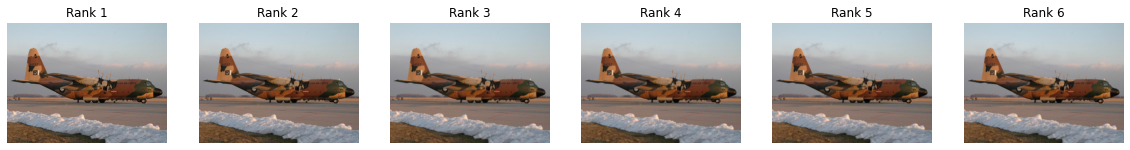

In [8]:
# Step 1: Load the original image and create multiple versions with varying qualities

# Re-import the necessary libraries in case the session has restarted
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('c130.jpg')

# Create multiple versions with varying blur levels (simulating different quality)
blurred_images = [cv2.GaussianBlur(original_image, (5, 5), sigmaX) for sigmaX in range(1, 6)]

# Step 2: Present pairs of images for Pair Comparison
# For simplicity, we'll assume a function `user_selects_better()` to simulate user input, which always selects the second image.
def user_selects_better(img1, img2):
    # Simulate user preference for the second image
    return img2

# Pairwise comparison - compare the original with each blurred version
pairwise_comparisons = [user_selects_better(original_image, blurred) for blurred in blurred_images]

# Step 3: Present all versions for Rank Order
# For simplicity, we'll assume a function `user_ranks_images()` to simulate user ranking, which prefers less blur.
def user_ranks_images(images):
    # Simulate user ranking based on the amount of blur (less blur is better)
    # In a real application, users would provide their ranking
    return sorted(images, key=lambda x: cv2.Laplacian(x, cv2.CV_64F).var(), reverse=True)

# Rank order - rank all images including the original
all_images = [original_image] + blurred_images
ranked_images = user_ranks_images(all_images)

# Display the ranked images
plt.figure(figsize=(20,10))
for i, img in enumerate(ranked_images, 1):
    plt.subplot(1, len(ranked_images), i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Rank {i}')
    plt.axis('off')
plt.show()


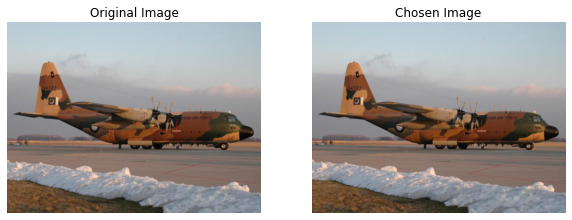

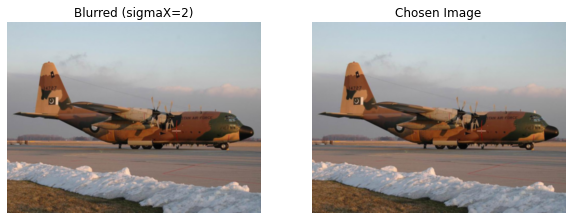

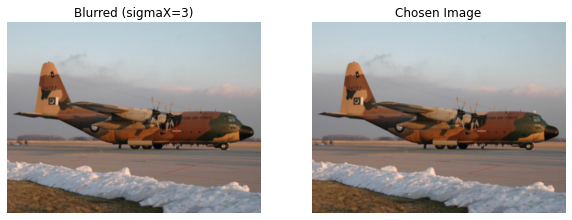

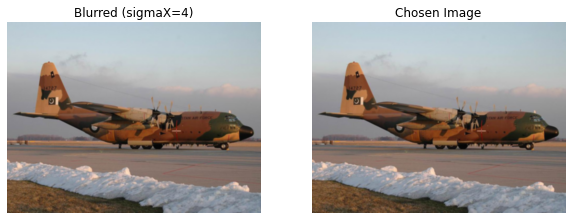

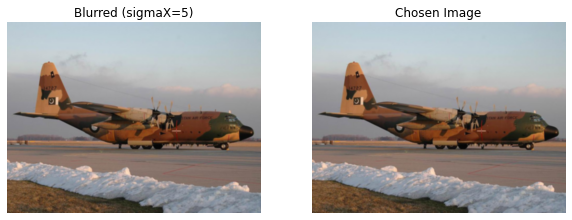

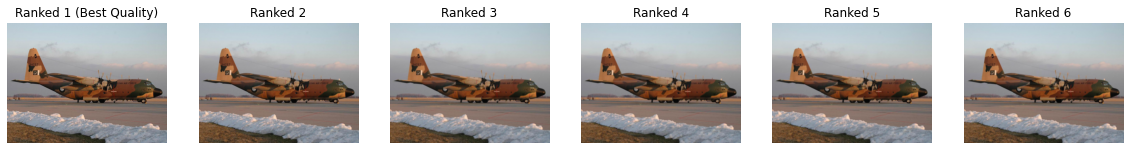

In [10]:
# Re-import the necessary libraries in case the session has restarted
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('c130.jpg')

# Create multiple versions with varying blur levels (simulating different quality)
blurred_images = [cv2.GaussianBlur(original_image, (5, 5), sigmaX) for sigmaX in range(1, 6)]

# Step 2: Present pairs of images for Pair Comparison
# For simplicity, we'll assume a function `user_selects_better()` to simulate user input, which always selects the second image.
def user_selects_better(img1, img2):
    # Simulate user preference for the second image
    return img2

# Pairwise comparison - compare the original with each blurred version
pairwise_comparisons = [user_selects_better(original_image, blurred) for blurred in blurred_images]

# Step 3: Present all versions for Rank Order
# For simplicity, we'll assume a function `user_ranks_images()` to simulate user ranking, which prefers less blur.
def user_ranks_images(images):
    # Simulate user ranking based on the amount of blur (less blur is better)
    # In a real application, users would provide their ranking
    return sorted(images, key=lambda x: cv2.Laplacian(x, cv2.CV_64F).var(), reverse=True)

# Rank order - rank all images including the original
all_images = [original_image] + blurred_images
ranked_images = user_ranks_images(all_images)

# Display the results
# Pairwise Comparisons
for i, comparison in enumerate(pairwise_comparisons, 1):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    if i == 1:
        plt.title("Original Image")
    else:
        plt.title(f"Blurred (sigmaX={i})")
    plt.imshow(cv2.cvtColor(comparison, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title("Chosen Image")
    plt.imshow(cv2.cvtColor(blurred_images[i-1], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Rank Order
plt.figure(figsize=(20, 10))
for i, ranked_image in enumerate(ranked_images):
    plt.subplot(1, len(ranked_images), i+1)
    if i == 0:
        plt.title("Ranked 1 (Best Quality)")
    else:
        plt.title(f"Ranked {i+1}")
    plt.imshow(cv2.cvtColor(ranked_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()



1. **Load the Original Image**: The original image is loaded from the provided path using OpenCV's `cv2.imread()` function. OpenCV reads the image in BGR format.

2. **Create Multiple Versions with Varying Qualities**: Different levels of Gaussian blur are applied to the original image to simulate different quality levels. This is done using the `cv2.GaussianBlur()` function, iterating over a range of sigma values that control the amount of blur. The list `blurred_images` should contain the original image and its blurred versions.

3. **Simulate Pair Comparison**: Normally, pair comparison would involve displaying two images to a user and asking them to choose the one with better quality. Here, we define a function `user_selects_better()` that simulates this process by automatically selecting the second image in each pair. The actual function would collect real user input.

4. **Simulate Rank Order**: This process would show all images to the user, who would then rank them based on quality. We simulate this with the function `user_ranks_images()`, which automatically ranks the images based on the amount of detected edges (less blur is perceived as higher quality). The edge detection is simulated using the `cv2.Laplacian()` function and sorting the images by the variance of the Laplacian (a measure of edge intensity).

5. **Display Ranked Images**: Finally, we use Matplotlib to display the ranked images in order of quality as determined by our simulated user ranking function.

